In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
#CV2 is open computer vision library that is helpful for image processing
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
#loading MNIST data by keras library of already pprocessed image data
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
#check shape of these numpy arrays
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

#(60000,28,28) where 60000 represents number of images, 28 x 28 is the size of every image

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Since this is a pre-processed image data, we have same pixel of image. else, we will have to process the image first

In [ ]:
#printing 10th image from training set
print(X_train[9])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 189 190   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 143 247 153   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 136 247 242  86   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 192 252 187   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  62 185  18   

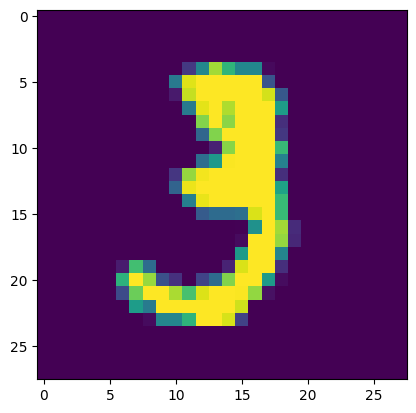

3


In [ ]:
#display image back
plt.imshow(X_train[10])
plt.show()
print(Y_train[10])


Model is trained for 0 to 9 numbers i.e. one digit to check that try to check unique values in Y_train and Y_test

In [ ]:
print(np.unique(Y_train))
print(np.unique(Y_test))
#we can apply one-hot encoding or we can keep these lables as it is

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
#the text data  X_train ranges from 0 to 255 where 0 denotes black color and 255 denotes white. Hence scaling the data to a smaller domain
#normalization
X_train = X_train/255
X_test = X_test/255


In [ ]:
X_train[9] #check the output where values come between 0 and 1

Build a CNN convolutional neural network and recurrent neural network RNN


1.   CNN is used for image recognition
2.   RNN is used for text/audio recognition


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
#for 4 or more outputs use softmax regression

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#if we apply one hot encoding use categorical entropy not sparse categorical entropy

In [ ]:
#train NN
model.fit(X_train,Y_train,epochs = 10)
#epochs tells howmany times you want your NN to go through your data


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3102 - accuracy: 0.9087
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1406 - accuracy: 0.9587
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1041 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0827 - accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0685 - accuracy: 0.9791
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0600 - accuracy: 0.9809
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0511 - accuracy: 0.9836
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0458 - accuracy: 0.9853
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0393 - accuracy: 0.9872
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.036

In [ ]:
#model.fit(X_test,Y_test,epochs = 10)
#check test data accuracy to check overfitting
loss,accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1174 - accuracy: 0.9700
0.9700000286102295


NN is not overfit as test accuracy is close to train data accuracy

In [ ]:
print(X_test.shape)

(10000, 28, 28)


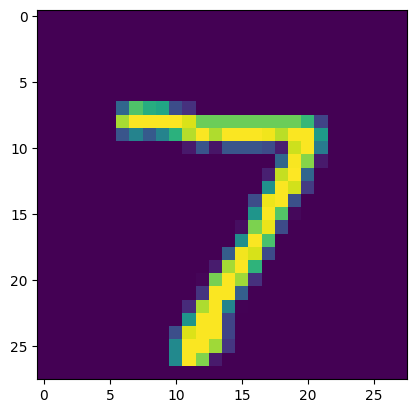

In [ ]:
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [ ]:
print(Y_pred.shape)
print(Y_pred[0])

(10000, 10)
[1.48829758e-06 3.78532559e-02 3.95368218e-01 9.21472609e-01
 1.42311419e-05 3.77115357e-04 1.16912756e-11 9.99999046e-01
 2.98486860e-03 7.24057019e-01]


In the shape value, '10' represents **probability** of that index number of all unqiue values that is possible in handwritten digit recognition
i.e. 1.488e-06 is probability of number being 0  , 3.785e-02 represnts probability of number being 1 and so on

In [ ]:
#convert prediction probabilities
label = np.argmax(Y_pred[0])
print(label)

7


In [ ]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
#this for loop takes value of every value in Y_pred as 10 vaues and will give out the max probability value
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 7, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
conf_mat = confusion_matrix(Y_test,Y_pred_labels)
print(conf_mat)
#true labels and predicted labels matrix

tf.Tensor(
[[ 955    0    2    3    1   10    4    3    2    0]
 [   0 1120    4    1    0    3    0    1    5    1]
 [   1    2  989   11    1    4    2   13    9    0]
 [   0    0    2  982    0   10    0   10    4    2]
 [   1    0    2    0  959    5    4    2    0    9]
 [   1    1    0   15    0  870    2    1    2    0]
 [   3    1    3    0    2   17  927    1    4    0]
 [   0    6    5    2    1    0    0 1007    3    4]
 [   1    1    1    9   12   22    1    4  917    6]
 [   2    2    0    6   16    8    0   11    1  963]], shape=(10, 10), dtype=int32)
